# Exploratory Data Analysis
This project is used to do some simple analyses of two large ETF's in the energy sector, USO and ICLN. One is an oil ETF, the other a clean energy ETF.

## Yahoo Finance Python API Wrapper
Here we use a Yahoo Finance wrapper to easily access their API and pull in data on certain stocks, markets, and commodities

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import pearsonr, ttest_ind
from scipy import stats

sns.set_theme(style="whitegrid")

In [2]:
icln_5y = yf.download("ICLN", '2018-01-01', '2023-01-01').reset_index()
uso_5y = yf.download("USO", '2018-01-01', '2023-01-01').reset_index()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Price Trends

First, we'll look at a comparison of the oil and clean energy ETFs over the past 5 years.

Text(0, 0.5, 'Price per Share $')

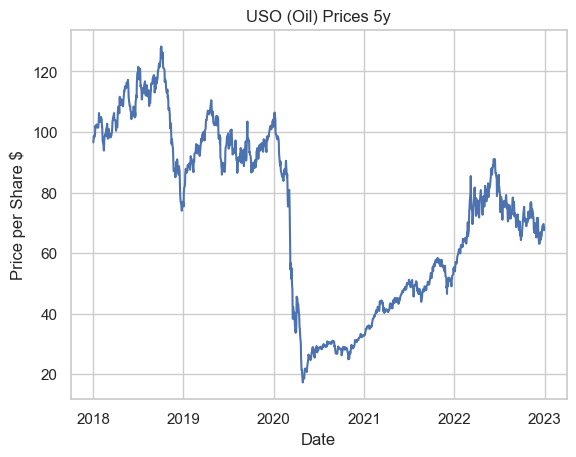

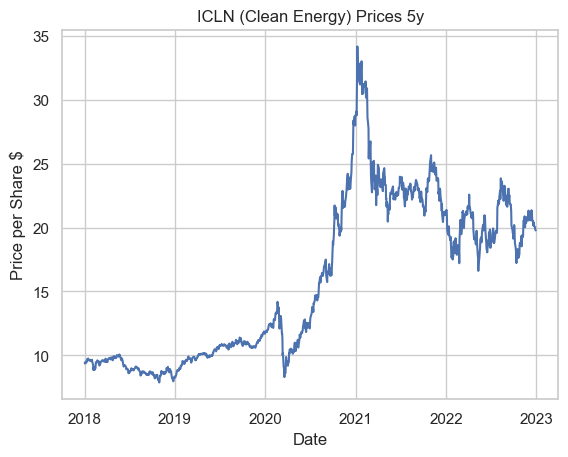

In [3]:
sns.lineplot(uso_5y, x="Date", y="Open")
plt.title("USO (Oil) Prices 5y")
plt.ylabel("Price per Share $")

plt.figure()

sns.lineplot(icln_5y, x="Date", y="Open")
plt.title("ICLN (Clean Energy) Prices 5y")
plt.ylabel("Price per Share $")

In [4]:
cor_5y = pearsonr(uso_5y["Open"], icln_5y["Open"])
print(f"The correlation between USO and ICLN over the past 5 years is {round(cor_5y[0], 3)} with a p-value of {round(cor_5y[1], 3)}.")

The correlation between USO and ICLN over the past 5 years is -0.653 with a p-value of 0.0.


Now we'll compare them just in 2022.

In [5]:
uso_1y = uso_5y.loc[uso_5y["Date"] > np.datetime64("2022-01-01")]
icln_1y = icln_5y.loc[icln_5y["Date"] > np.datetime64("2022-01-01")]

Text(0, 0.5, 'Price per Share $')

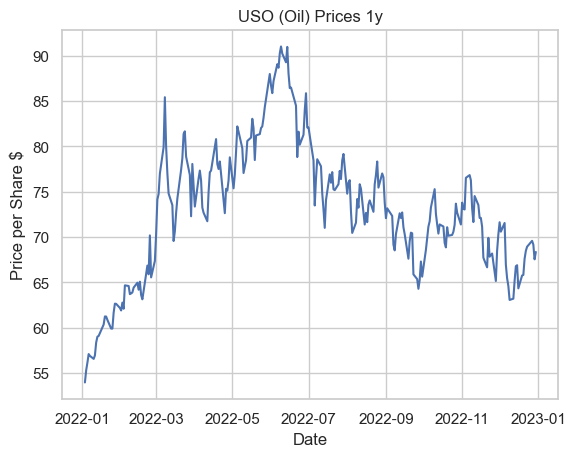

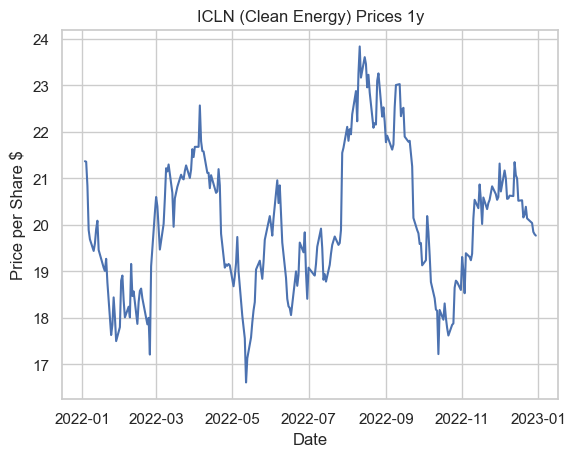

In [6]:
sns.lineplot(uso_1y, x="Date", y="Open")
plt.title("USO (Oil) Prices 1y")
plt.ylabel("Price per Share $")

plt.figure()

sns.lineplot(icln_1y, x="Date", y="Open")
plt.title("ICLN (Clean Energy) Prices 1y")
plt.ylabel("Price per Share $")

In [7]:
cor_1y = pearsonr(uso_1y["Open"], icln_1y["Open"])
print(f"The correlation between USO and ICLN over 2022 is {round(cor_1y[0], 3)} with a p-value of {round(cor_1y[1], 3)}.")

The correlation between USO and ICLN over 2022 is 0.043 with a p-value of 0.495.


## Volume Trends

Now we'll check if the volume of trades between the two ETFs is significantly different

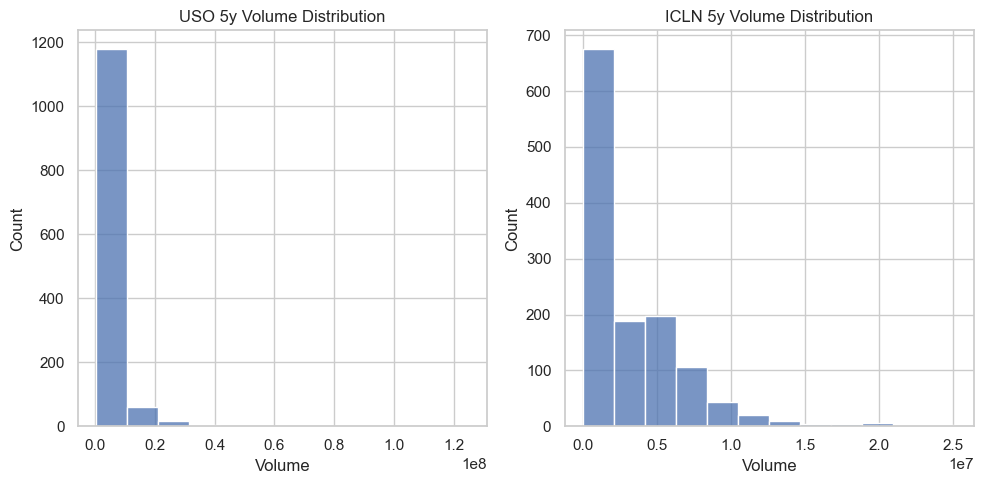

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(uso_5y.Volume, bins="sturges", ax=axs[0])
sns.histplot(icln_5y.Volume, bins="sturges", ax=axs[1])

axs[0].set_title("USO 5y Volume Distribution")
axs[1].set_title("ICLN 5y Volume Distribution")

plt.tight_layout()

In [9]:
print(f"The USO mean trading volume over the past 5 years is {round(uso_5y.Volume.mean())}.")
print(f"The ICLN mean trading volume over the past 5 years is {round(icln_5y.Volume.mean())}.")

The USO mean trading volume over the past 5 years is 5266591.
The ICLN mean trading volume over the past 5 years is 3010962.


In [10]:
ttest_ind(uso_5y.Volume, icln_5y.Volume)

Ttest_indResult(statistic=10.943240560853619, pvalue=2.9163506286554536e-27)

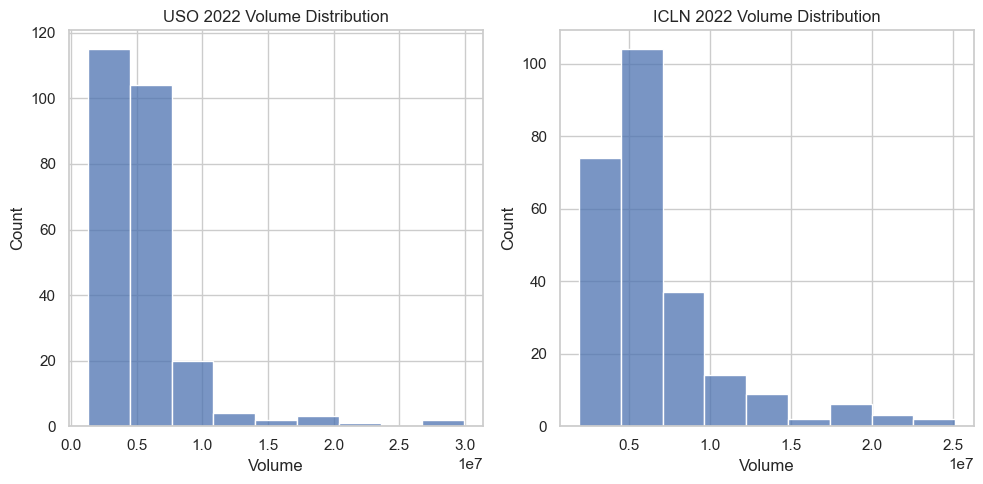

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

sns.histplot(uso_1y.Volume, bins="sturges", ax=axs[0])
sns.histplot(icln_1y.Volume, bins="sturges", ax=axs[1])

axs[0].set_title("USO 2022 Volume Distribution")
axs[1].set_title("ICLN 2022 Volume Distribution")

plt.tight_layout()

In [12]:
print(f"The USO mean trading volume over 2022 is {round(uso_1y.Volume.mean())}.")
print(f"The ICLN mean trading volume over 2022 is {round(icln_1y.Volume.mean())}.")

The USO mean trading volume over 2022 is 5418460.
The ICLN mean trading volume over 2022 is 6667941.


In [13]:
ttest_ind(uso_5y.Volume, icln_5y.Volume)

Ttest_indResult(statistic=10.943240560853619, pvalue=2.9163506286554536e-27)

So both ETFs have significantly different mean trade volumes in each respective time period. When looking at 5y, USO has a higher mean, but in 2022 ICLN had a higher trading volume.

## Looking at Volatility
Now we'll check out volatility between the two stocks by looking at the standard deviation of their price. This should probably actually done by percentage of the stocks price, as strictly using the dollar value doesn't tell too much of a story. We are going to exclude this section from suggestions and our report.

In [14]:
print("USO 5y sd: ", round(np.std(uso_5y.Open), 3), "\n",
    "ICLN 5y sd: ", round(np.std(icln_5y.Open), 3))

USO 5y sd:  28.91 
 ICLN 5y sd:  6.285


In [15]:
print("USO 1y sd: ", round(np.std(uso_1y.Open), 3), "\n",
    "ICLN 1y sd: ", round(np.std(icln_1y.Open), 3))

USO 1y sd:  7.39 
 ICLN 1y sd:  1.501
